In [1]:
import os
import sys

path = '/home/seq/pelenet'
sys.path.append(path)
os.chdir(path)

In [2]:
# Allow reload of objects
%load_ext autoreload
%autoreload

from pelenet.utils import Utils
from pelenet.experiments.assemblies import AssemblyExperiment
from pelenet.experiments.assembliesoutput import AssemblyOutputExperiment

# Official modules
import numpy as np
from scipy import sparse
import nxsdk.api.n2a as nx
import matplotlib
import matplotlib.pyplot as plt
from time import time
from copy import deepcopy

In [3]:
# Overwrite default parameters (pelenet/parameters/ and pelenet/experiments/random.py)
parameters = {
    # Experiment
    'seed': 2,  # Random seed
    'trials': 20, #20,  # Number of trials
    'stepsPerTrial': 50, #40, #50,  # Number of simulation steps for every trial
    'isReset': True,  # Activate reset after every trial
    # Network
    'reservoirExSize': 400,  # Number of excitatory neurons
    'reservoirConnPerNeuron': 40, #40, #35 # Number of connections per neuron
    # Noise
    'isNoise': True,
    'onlyExcitatory': True,  # Noisy input is only excitatory
    'noiseMaxWeight': 120, #120,
    # Neurons
    'refractoryDelay': 2, # Refactory period
    'voltageTau': 100, #100 # Voltage time constant
    'currentTau': 6, #5 # Current time constant
    'thresholdMant': 1200,  # Spiking threshold for membrane potential
    # Plasticity
    'isLearningRule': True,
    'learningEpoch': 4,
    'learningRule': '2^-4*x1*y1*x0*y0 - 2^-3*y0*w*w',
    # Input
    'inputIsAlternating': True,
    'inputAlternatingNum': 1,
    'inputOffset': 10,
    'inputGenSpikeProb': 0.8,  # Probability of spikes for the spike generators
    'inputNumTargetNeurons': 40,  # Number of neurons targeted by the spike generators
    'inputSteps': 40, #20, #30,  # Number of steps the input is active
    # Probes
    'isExSpikeProbe': True,  # Probe excitatory spikes
    'isInSpikeProbe': True,  # Probe inhibitory spikes
    'isWeightProbe': True  # Probe weight matrix at the end of the simulation
}

In [4]:
# Initilizes the experiment and utils
exp = AssemblyExperiment(name='assemblies', parameters=parameters)
utils = Utils.instance()

In [5]:
# Build network
exp.build()

# Get spectral radius
utils.getSpectralRadius(exp.net.initialWeights)

0.987

In [6]:
#exp.net.plot.initialExWeightDistribution()

In [7]:
#exp.net.noiseWeights.toarray()[:20,:20]

In [8]:
pars = exp.net.p

In [9]:
# Run network
exp.run()

INFO:DRV:  Connecting to 127.0.0.1:38815
INFO:DRV:      Host server up..............Done 0.50s
INFO:DRV:      Encoding axons/synapses.....Done 0.38s
Compiling in directory : /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.6/site-packages/nxsdk/driver/compilers/../../../temp/1634421439.7166317
Include dir is : /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.6/site-packages/nxsdk/graph/nxinputgen/../../snips/ -I/home/seq/pelenet/pelenet/snips/
Compiling -c /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.6/site-packages/nxsdk/driver/compilers/../../../temp/1634421439.7166317/initnetwork_0_0.c
gcc -Wall -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.6/site-packages/nxsdk/graph/nxinputgen/../../snips/ -I/home/seq/pelenet/pelenet/snips/ -Inxsdk/include -fno-stack-protector -msoft-float -m32 -march=i586 -fno-builtin-printf -fno-builtin-sprintf -fno-builtin-fprintf -fno-builtin-memcpy -fstrict-volatile-bitfields -Os -DNDEBUG -std=c99 -o /home/

INFO:HST:  Args chip=0 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.6/site-packages/nxsdk/driver/compilers/../../../temp/1634421439.7166317/launcher_chip0_lmt0.bin --chips=1 --remote-relay=0 --epoch=4 
INFO:HST:  Lakemont_driver...
INFO:HST:  chip=0 cpu=0 Transfered values 20, 70, 10 
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 1 to 10
INFO:HST:  chip=0 cpu=0 Reset functional state at 10
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 71 to 80
INFO:HST:  chip=0 cpu=0 Reset functional state at 80
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 141 to 150
INFO:HST:  chip=0 cpu=0 Reset functional state at 150
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 211 to 220
INFO:HST:  chip=0 cpu=0 Reset functional state at 220
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 281 to 290
INFO:HST:  chip=0 cpu=0 Reset functional state at 290
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 351 to 36

/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


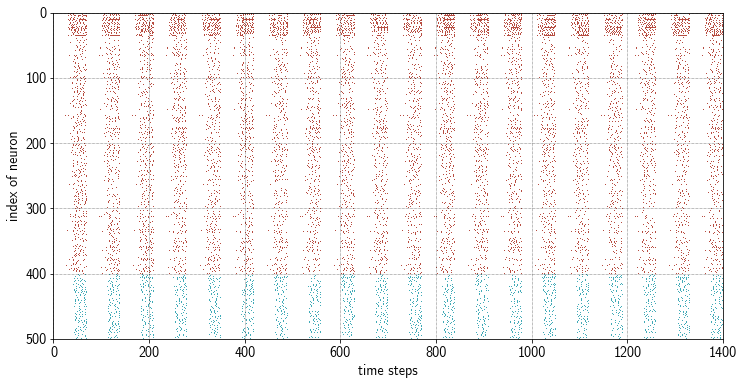

In [10]:
# Plot spike trains of the excitatory (red) and inhibitory (blue) neurons
exp.net.plot.reservoirSpikeTrain(figsize=(12,6))

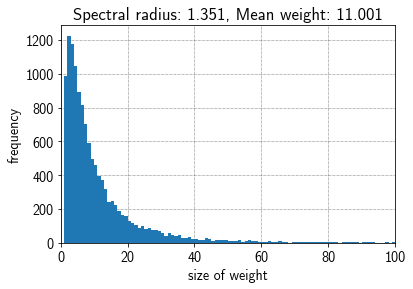

In [11]:
exp.net.plot.initialExWeightDistribution(figsize=(6,4), xlim=(0,100))

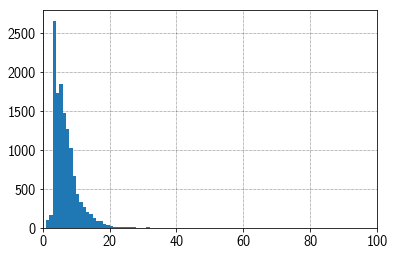

In [12]:
#exp.net.plot.trainedExWeightDistribution(figsize=(6,4), xlim=(0,100))

wgt = exp.net.trainedWeightsExex[-1].toarray().flatten()
nz = np.array(np.nonzero(wgt)[0])

plt.hist(wgt[nz], bins=np.arange(np.max(wgt[nz])))
plt.xlim((0,100))
pl = plt.show()

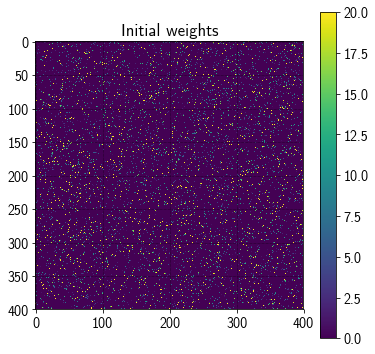

In [13]:
# Weight matrix before learning
exp.net.plot.initialExWeightMatrix()

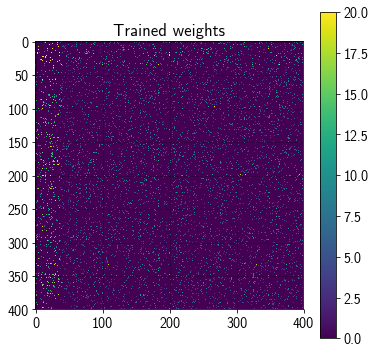

In [14]:
# Weight matrix after learning
exp.net.plot.trainedExWeightMatrix()

In [15]:
size = exp.p.inputNumTargetNeurons

input_regions = exp.net.trainedWeightsExex[-1].toarray()[:2*size,:2*size]

inp_lt = input_regions[:size,:size]
inp_rt = input_regions[size:,:size]
inp_lb = input_regions[:size,size:]
inp_rb = input_regions[size:,size:]

print(np.mean(inp_lt), np.mean(inp_rt), np.mean(inp_lb), np.mean(inp_rb))

1.336875 0.753125 0.61875 0.4


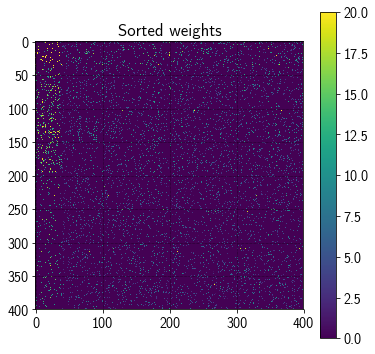

In [16]:
# Sorted weight matrix after learning
expSupportMask = utils.getSupportWeightsMask(exp.net.trainedWeightsExex[-1])
exp.net.plot.weightsSortedBySupport(expSupportMask, exp.net.trainedWeightsExex[-1])

In [17]:
nCs = exp.net.p.inputNumTargetNeurons
nEx = exp.net.p.reservoirExSize
nC = exp.net.p.inputAlternatingNum

In [18]:
nCs, nEx, nC

(40, 400, 1)

In [19]:
#weightsExEx = exp.net.trainedWeightsExex[-1]
#np.save('weightsExEx', weightsExEx)

In [20]:
inputs = utils.getInputLetterList(exp.net.inputTrials)

In [21]:
supportMasks = utils.getSupportMasksForAllTrials(exp.net.initialWeights.exex, exp.net.trainedWeightsExex)
supportMasks.shape

(21, 2, 360)

In [22]:
np.array(supportMasks)[0][1].shape

(360,)

In [23]:
supportShare = np.array([ np.sum(supportMasks[i], axis=1) for i in range(exp.p.trials+1)]).T

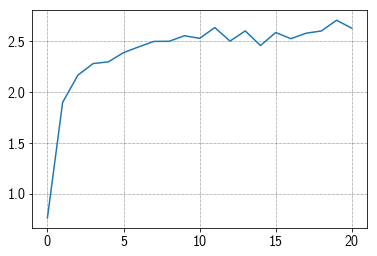

In [24]:
cluster_mean = []
all_mean = []

cluster_mean.append(np.mean(exp.net.initialWeights.exex[:40,:40]))
all_mean.append(np.mean(exp.net.initialWeights.exex))

for i in range(exp.p.trials):
    cluster_mean.append(np.mean(exp.net.trainedWeightsExex[i][:40,:40]))
    all_mean.append(np.mean(exp.net.trainedWeightsExex[i]))

cluster_mean = np.array(cluster_mean)
all_mean = np.array(all_mean)

x = cluster_mean/all_mean
plt.plot(x)

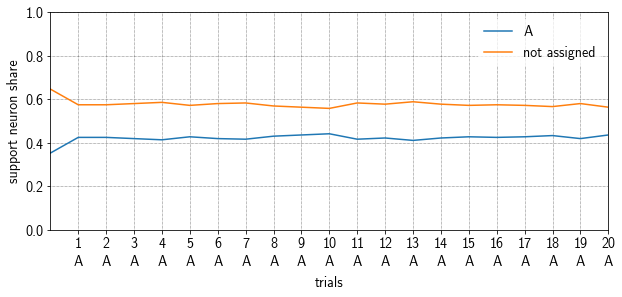

In [25]:
exp.net.plot.supportShare(supportMasks)

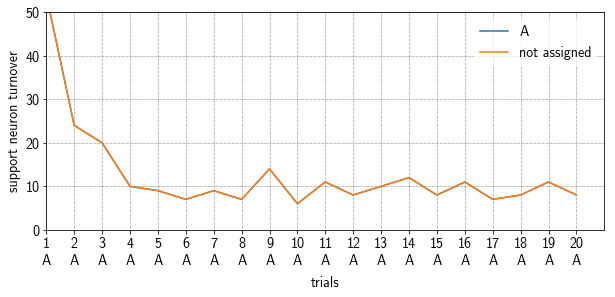

In [26]:
exp.net.plot.supportTurnover(supportMasks)

In [27]:
# New parameters
newParameters = {
    **parameters,
    'trials': 2*exp.p.trials,
    'inputAlternatingNum': 2
}

In [28]:
# Initilizes a second experiment
exp2 = AssemblyExperiment(name='assemblies-2', parameters=newParameters)

In [29]:
# Get weights from previous experiment
weights = deepcopy(exp.net.initialWeights)
weights.exex = exp.net.trainedWeightsExex[-1]

# Build experiment
exp2.build()
exp2.net.initialMasks = exp.net.initialMasks
exp2.net.initialWeights = weights

In [30]:
# Run network
exp2.run()

INFO:DRV:  Connecting to 127.0.0.1:35933
INFO:DRV:      Host server up..............Done 0.19s
INFO:DRV:      Encoding axons/synapses.....Done 0.28s
Compiling in directory : /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.6/site-packages/nxsdk/driver/compilers/../../../temp/1634421490.5254667
Include dir is : /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.6/site-packages/nxsdk/graph/nxinputgen/../../snips/ -I/home/seq/pelenet/pelenet/snips/
Compiling -c /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.6/site-packages/nxsdk/driver/compilers/../../../temp/1634421490.5254667/initnetwork_0_0.c
gcc -Wall -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.6/site-packages/nxsdk/graph/nxinputgen/../../snips/ -I/home/seq/pelenet/pelenet/snips/ -Inxsdk/include -fno-stack-protector -msoft-float -m32 -march=i586 -fno-builtin-printf -fno-builtin-sprintf -fno-builtin-fprintf -fno-builtin-memcpy -fstrict-volatile-bitfields -Os -DNDEBUG -std=c99 -o /home/

INFO:DRV:      Configuring registers.......Done 0.48s
INFO:DRV:      Transferring spikes.........Done 1.12s
INFO:HST:  Using Kapoho Bay serial number 308
INFO:HST:  Args chip=0 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.6/site-packages/nxsdk/driver/compilers/../../../temp/1634421490.5254667/launcher_chip0_lmt0.bin --chips=1 --remote-relay=0 --epoch=4 
INFO:HST:  Lakemont_driver...
INFO:HST:  chip=0 cpu=0 Transfered values 20, 70, 10 
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 1 to 10
INFO:HST:  chip=0 cpu=0 Reset functional state at 10
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 71 to 80
INFO:HST:  chip=0 cpu=0 Reset functional state at 80
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 141 to 150
INFO:HST:  chip=0 cpu=0 Reset functional state at 150
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 211 to 220
INFO:HST:  chip=0 cpu=0 Reset functional state at 220
INFO:HST:  chip=0 cpu=0 Reset current/volt

INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2101 to 2110
INFO:HST:  chip=0 cpu=0 Reset functional state at 2110
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2171 to 2180
INFO:HST:  chip=0 cpu=0 Reset functional state at 2180
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2241 to 2250
INFO:HST:  chip=0 cpu=0 Reset functional state at 2250
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2311 to 2320
INFO:HST:  chip=0 cpu=0 Reset functional state at 2320
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2381 to 2390
INFO:HST:  chip=0 cpu=0 Reset functional state at 2390
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2451 to 2460
INFO:HST:  chip=0 cpu=0 Reset functional state at 2460
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2521 to 2530
INFO:HST:  chip=0 cpu=0 Reset functional state at 2530
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2591 to 2600
INFO:HST:  chip=0 cpu=0

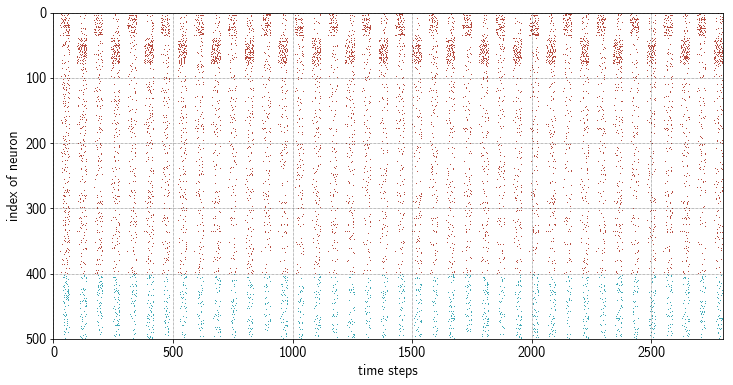

In [31]:
exp2.net.plot.reservoirSpikeTrain(figsize=(12,6))

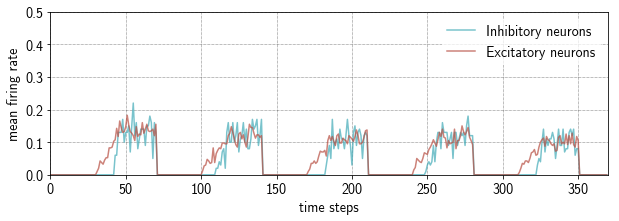

In [32]:
exp2.net.plot.reservoirRates(figsize=(10,3), fr=0, to=370)

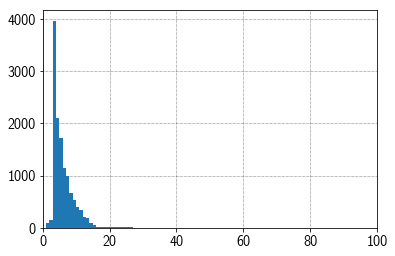

In [33]:
wgt = exp2.net.trainedWeightsExex[-1].toarray().flatten()
nz = np.array(np.nonzero(wgt)[0])

plt.hist(wgt[nz], bins=np.arange(np.max(wgt[nz])))
plt.xlim((0,100))
pl = plt.show()

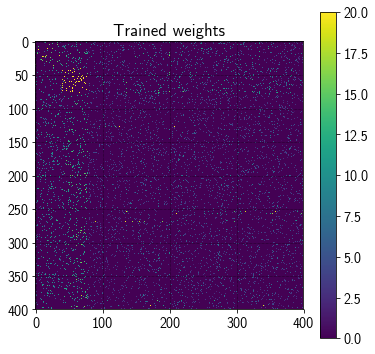

In [34]:
# Weight matrix after learning
exp2.net.plot.trainedExWeightMatrix()

In [35]:
size = exp2.p.inputNumTargetNeurons

input_regions = exp2.net.trainedWeightsExex[-1].toarray()[:2*size,:2*size]

inp_lt = input_regions[:size,:size]
inp_rt = input_regions[size:,:size]
inp_lb = input_regions[:size,size:]
inp_rb = input_regions[size:,size:]

print(np.mean(inp_lt), np.mean(inp_rt), np.mean(inp_lb), np.mean(inp_rb))

0.91875 0.505 0.77 1.655625


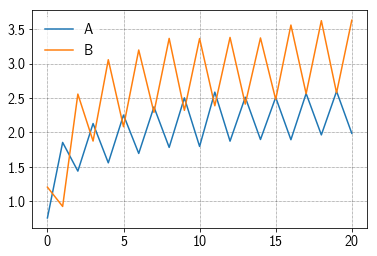

In [36]:
cluster1_mean = []
cluster2_mean = []
all_mean = []

cluster1_mean.append(np.mean(exp.net.initialWeights.exex[:size,:size]))
cluster2_mean.append(np.mean(exp.net.initialWeights.exex[size:2*size,size:2*size]))
all_mean.append(np.mean(exp.net.initialWeights.exex))

for i in range(exp.p.trials):
    cluster1_mean.append(np.mean(exp2.net.trainedWeightsExex[i][:size,:size]))
    cluster2_mean.append(np.mean(exp2.net.trainedWeightsExex[i][size:2*size,size:2*size]))
    all_mean.append(np.mean(exp2.net.trainedWeightsExex[i]))

cluster1_mean = np.array(cluster1_mean)
cluster2_mean = np.array(cluster2_mean)
all_mean = np.array(all_mean)

c1 = cluster1_mean/all_mean
c2 = cluster2_mean/all_mean
plt.plot(c1, label='A')
plt.plot(c2, label='B')
plt.legend()
pl = plt.show()